# ODE Boundary Value Problems

## Content
- Shooting Method
- Thomas Method
- Relaxation Method


## Shooting Method
### Problem: 
$$
u^{\prime\prime}=f(u, u^{\prime}, x)
$$
### Solution:  
1. To dynamic form:  
    $$
    \frac{d}{dx}
    \begin{pmatrix}
    z_0 \\
    z_1
    \end{pmatrix}
    =
    \begin{pmatrix}
    z_1 \\
    f(u, u^{\prime}, x)
    \end{pmatrix}
    $$
2. If BVC is: $u(a)=u_0, u(b)=u_1$  
    Guess $u^{\prime}(a) = \alpha$, calculate $u(b)$  
     we get a funcition: $u(b) = F(\alpha)$  
3. Solve $\alpha$ in $F(\alpha)=u_1$, by bisection or Newton method 

## Thomas Method (Finite Difference Method)
### Solution
1. Discretization: 
$$
x_i = x_0 + ih  
$$
$$
u_i = u(x_i)
$$
2. Finite difference:
$$u^{\prime}(x_i) \approx (u_{i+1}-u_{i-1})/(2h)$$
$$u^{\prime\prime}(x_i) \approx (u_{i+1}-2u_{i}+u_{i-1})/(h^2)$$
3. Build matrix with BVP

In [12]:
# ONLY for second order ODE
import numpy as np
def ODE_BVP(para, h, interval, bc):
    # x is a function of t
    # change the function to ax'' + bx' + cx = d form. (ONLY)
    # para should be a function of t, return a list: [a, b, c, d]

    t = np.arange(interval[0], interval[1] + h, h)
    size = t.shape[0]

    # build matrix, x and b
    mat = np.mat(np.zeros([size, size]))
    B = np.mat(np.zeros([size, 1]))
    x = np.mat(np.zeros([size, 1]))

    # BVC
    mat[0, 0] = 1
    mat[size-1, size-1] = 1
    B[0, 0] = bc[0]
    B[size-1, 0] = bc[1]

    # derivatives
    for i in range(1, size-1):
        a, b, c, d = para(t[i])
        mat[i, i-1] = a / h**2 - b / h / 2
        mat[i, i] = -2 * a / h**2 + c
        mat[i, i+1] = a / h**2 + b / h / 2
        B[i, 0] = d

    # solve the function
    x = mat.I * B
    return np.array(x).reshape(-1)

## Relaxation Method
pass

## Scipy function
solve_bvp(fun, bc, x, y, p=None, S=None, fun_jac=None, bc_jac=None, tol=0.001, max_nodes=1000, verbose=0, bc_tol=None)

for Dynamic form (first order):  
dy / dx = f(x, y, p) + S * y / (x - a), a <= x <= b  
BVC: bc(y(a), y(b), p) = 0

Here x is a 1-D independent variable, y(x) is an N-D vector-valued function and p is a k-D vector of unknown parameters which is to be found along with y(x). For the problem to be determined, there must be n + k boundary conditions, i.e., bc must be an (n + k)-D function

### Parameters
fun: callable  
Right-hand side of the system. The calling signature is fun(x, y), or fun(x, y, p) if parameters are present. All arguments are ndarray: x with shape (m,), y with shape (n, m), meaning that y[:, i] corresponds to x[i], and p with shape (k,). The return value must be an array with shape (n, m) and with the same layout as y.

bc: callable  
Function evaluating residuals of the boundary conditions. The calling signature is bc(ya, yb), or bc(ya, yb, p) if parameters are present. All arguments are ndarray: ya and yb with shape (n,), and p with shape (k,). The return value must be an array with shape (n + k,).

x: array_like, shape (m,)  
Initial mesh. Must be a strictly increasing sequence of real numbers with x[0]=a and x[-1]=b.

y: array_like, shape (n, m)  
Initial guess for the function values at the mesh nodes, ith column corresponds to x[i]. For problems in a complex domain pass y with a complex data type (even if the initial guess is purely real).

p: array_like with shape (k,) or None, optional  
Initial guess for the unknown parameters. If None (default), it is assumed that the problem doesn’t depend on any parameters.

S: array_like with shape (n, n) or None  
Matrix defining the singular term. If None (default), the problem is solved without the singular term.

### Returns
Bunch object with the following fields defined:

sol: PPoly  
Found solution for y as scipy.interpolate.PPoly instance, a C1 continuous cubic spline.

p: ndarray or None, shape (k,)  
Found parameters. None, if the parameters were not present in the problem.

x: ndarray, shape (m,)  
Nodes of the final mesh.

y: ndarray, shape (n, m)  
Solution values at the mesh nodes.

yp: ndarray, shape (n, m)  
Solution derivatives at the mesh nodes.

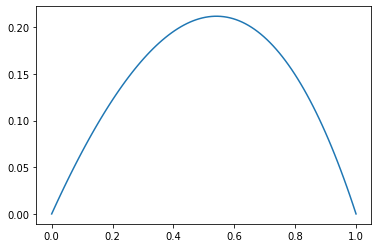

In [8]:
# test scipy: solve f''(x)=-exp(x) in (0, pi), BVP=[0, 0]

from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import numpy as np

a, b = 0, 1

dynamic_func = lambda x, y: [y[1], -np.exp(x)]
bc = lambda ya, yb: [ya[0], yb[0]]

x = np.linspace(a, b, 100)
y = np.zeros((2, 100)) # init value, determins the final result

sol = solve_bvp(dynamic_func, bc, x, y)

result_x = sol.x
result_y = sol.y[0]
plt.plot(result_x, result_y)
plt.show()

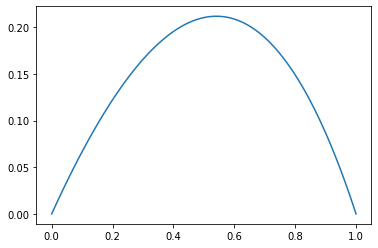

In [13]:
# test Thomas method:
para = lambda x: [1, 0, 0, -np.exp(x)]
result_x_2 = np.linspace(0, 1, 101)
result_y_2 = ODE_BVP(para, 0.01, [0, 1], [0, 0])
plt.plot(result_x_2, result_y_2)
plt.show()